In [2]:
import dolfin as fn
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from projectKL import projectKL
import scipy.io as sio

from IPython.display import HTML, display
display(HTML("<style>.container { width:95% !important; }</style>"))

import ipywidgets as wd

# Compute KL Expansions

In this notebook, we compute the eigenvalues and eigenfunctions of the KL-expansions. This relies on the `projectKL.py` and `meshDS.py` code files.

First we choose a covariance function for the representation of the permeability fields. Let the Covariance function between two points $u,v\in\Omega:=[0,1]\times[0,1]$ for this example be exponential:

\begin{align}
C(u,v)&=c\cdot\exp\left(-\frac{\left|u_x-v_x\right|}{\gamma_x}+-\frac{\left|u_y-v_y\right|}{\gamma_y}\right)
\end{align}

with $c=1$, $\gamma_x=3$ and $\gamma_y=2$.


In [4]:
# Create the covariance expression to project on the mesh.
etaX = 3.0
etaY = 2.0
C = 1

# Pick your favorite covariance. Popular choices are Gaussian (of course),
# Exponential, triangular (has finite support which is nice). Check out
# Ghanem and Spanos' book for more classical options. 

# Here we use an exponential covariance

class expCov(fn.UserExpression):
    def __init__(self, ex, ey, C, **kwargs):
        self.ex = ex
        self.ey = ey
        self.C = C
        super().__init__(**kwargs)
    def eval(self, v, x):
        v[0] = self.C*fn.exp(-np.abs(x[0]-x[1])/self.ex - np.abs(x[2]-x[3])/self.ey)
        return v
    def value_shape(self):
        return ()

# A Gaussian Covariance
# cov = fn.Expression("C*exp(-((x[0]-x[1]))*((x[0]-x[1]))/ex - ((x[2]-x[3]))*((x[2]-x[3]))/ey)",
#                     ex=etaX, ey=etaY, C=C, degree=2)
# An Exponential Covariance
cov = expCov(ex=etaX, ey=etaY, C=C, degree=1)


## Compute Full KL Expansion on Fine Mesh

This section computes the KL expansion eigenfunctions and eigenvalues on a fine 50x50 mesh with 100 terms. It takes a long time to run (around 3~ish hours)

In [ ]:
# # number of KL expansion terms.
# numKL = 100

# # Step 1: Set up the Mesh and Function Space

# # mesh = fn.Mesh("Lshaped.xml")
# mesh = fn.RectangleMesh(fn.Point(0,0),fn.Point(1,1),50,50)

# # Plot the mesh for visual check
# fn.plot(mesh)

# # initialize the mesh to generate connectivity
# mesh.init()

# # Random field is projected on the space of Hat functions in the mesh 
# V = fn.FunctionSpace(mesh, "CG", 1)

# V_adj = fn.FunctionSpace(mesh, "CG", 2)

In [ ]:
# # Steps 2 and 3: Project covariance onto the mesh and get the eigenfunctions

# # Initialize the projectKL object with the mesh
# Lmesh = projectKL(mesh)

# # Solve the discrete covariance relation on the mesh
# Lmesh.projectCovToMesh(numKL,cov)

# # Get the eigenfunctions and eigenvalues
# eigen_func = Lmesh.eigen_funcs
# eigen_val = Lmesh.eigen_vals

# print('eigen_vals')
# print(eigen_val)
# print(eigen_val.sum())

In [ ]:
# # save the eigenvalues and eigenfunctions
# eigen_func_mat = np.zeros(
#     (numKL, Lmesh.eigen_funcs[0].vector().vec().array.size))

# for i in range(0, numKL):
#     eigen_func_mat[i, :] = Lmesh.eigen_funcs[i].vector().vec().array

    
# sio.savemat("KL_expansion",{'eigen_val':eigen_val,'eigen_func':eigen_func_mat})

## Compute KL Expansion for Coarse Mesh

Computes the KL Expansion eigenfunctions and eigenvalues on a coarse mesh (10x10) and 100 terms. This does not take too long.

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


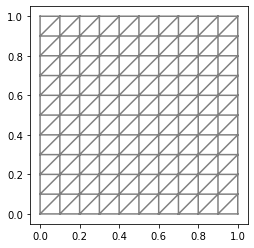

In [3]:
# number of KL expansion terms.
numKL = 100

# Step 1: Set up the Mesh and Function Space

# mesh = fn.Mesh("Lshaped.xml")
mesh = fn.RectangleMesh(fn.Point(0,0),fn.Point(1,1),10,10)

# Plot the mesh for visual check
fn.plot(mesh)

# initialize the mesh to generate connectivity
mesh.init()

# Random field is projected on the space of Hat functions in the mesh 
V = fn.FunctionSpace(mesh, "CG", 1)

V_adj = fn.FunctionSpace(mesh, "CG", 2)

In [5]:
# Steps 2 and 3: Project covariance onto the mesh and get the eigenfunctions

# Initialize the projectKL object with the mesh
Lmesh = projectKL(mesh)


# Solve the discrete covariance relation on the mesh
Lmesh.projectCovToMesh(numKL,cov)

# Get the eigenfunctions and eigenvalues
eigen_func = Lmesh.eigen_funcs
eigen_val = Lmesh.eigen_vals

print('eigen_vals')
print(eigen_val)
print(eigen_val.sum())

---------------------------
---------------------------
 Building Covariance Matrix
---------------------------
---------------------------
---------------------------
---------------------------
 Finished Covariance Matrix
---------------------------
---------------------------
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
---------------------------
---------------------------
 Building Mass Matrix 
---------------------------
---------------------------
---------------------------
---------------------------
 Finished Mass Matrix 
---------------------------
---------------------------
Calling FFC just-in-time (JIT) compiler, this may take some time.
eigen_vals
[7.67277403e-01 7.46568858e-02 5.04264852e-02 2.13345916e-02
 1.37699949e-02 9.60280891e-03 6.13450142e-03 5.

In [6]:
# save the eigenvalues and eigenfunctions
eigen_func_mat = np.zeros(
    (numKL, Lmesh.eigen_funcs[0].vector().vec().array.size))

for i in range(0, numKL):
    eigen_func_mat[i, :] = Lmesh.eigen_funcs[i].vector().vec().array

    
sio.savemat("KL_expansion_coarse",{'eigen_val':eigen_val,'eigen_func':eigen_func_mat})

# Summary

Now that the eigenfunctions and eigenvalues have been computed, we can represent the permeability field. See the [next notebook](Represent_Solve_PDE.ipynb) where we represent the permeability with the KL expansion (eigenvalues and eigenvectors computed here) and solve the PDE.